# 데이터 전처리

## 넘파이로 데이터 준비하기

In [1]:
import numpy as np

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

**두 리스트 열방향으로 합치기: 2차원 배열로**

In [3]:
# 앞에 for문 사용한걸 np로 쉽게 만드는 방법
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

**라벨 데이터**

In [6]:
# ones : 1로 채우기
# concatenate : 옆 열에 추가
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 사이킷런으로 훈련 데이터와 테스트 데이터 나누기

In [8]:
from sklearn.model_selection import train_test_split

**train_test_split(매개변수들)**
- *array : feature dataset, label dataset 
- test_size = None 
- train_size = None
- shuffle = True
- stratify = None
- random_state = None

In [10]:
# * : 1개 이상
# ramdom_state : random seed와 비슷
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [11]:
type(test_input)

numpy.ndarray

In [12]:
train_input.shape

(36, 2)

In [13]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
train_target

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0.])

**데이터 분포를 반영한 분할**

In [15]:
# stratify : 분포 조절
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [16]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

## 성능 평가 및 테스트

In [18]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?

In [19]:
kn .predict([[25, 150]])

array([0.])

**테스트할 도미 데이터를 포함한 산점도**

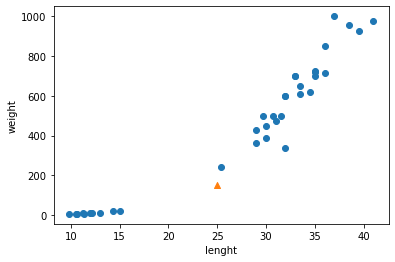

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

**테스트할 도미데이터와 이웃하는 데이터들**

In [22]:
# kneighbors : 근처 이웃을 알려줌
dist, idx = kn.kneighbors([[25, 150]])

In [23]:
idx

array([[21, 33, 19, 30,  1]], dtype=int64)

In [24]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [25]:
# idx의 거리를 보여줌
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

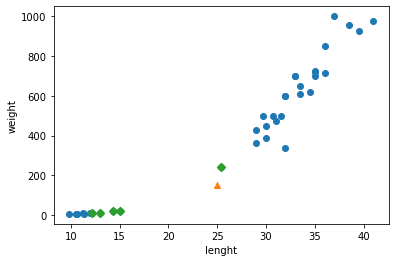

In [26]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [27]:
train_target[idx]

array([[1., 0., 0., 0., 0.]])

In [28]:
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

## 기준을 맞춰라

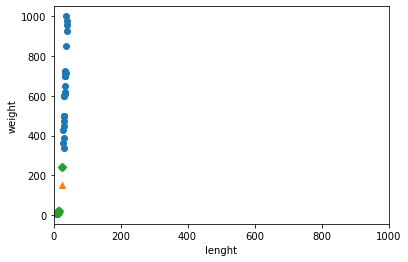

In [29]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')
plt.xlim(0, 1000)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 최근접이웃 알고리즘은 거리를 기반으로 가까운 이웃을 결정
- 거리 계산 시 자료의 값이 큰 변수에 더 큰 영향을 받게 됨

### 두 변수의 스케일을 갖게
- 표준점수(Z-Score)

**브로드 캐스팅**

In [30]:
# 평균
# axis=0 : 모든 행
mean = np.mean(train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [31]:
# 표준편차
std = np.std(train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [32]:
train_scaled = (train_input - mean)/std

In [34]:
np.mean(train_scaled, axis=0)

array([ 5.24271984e-16, -1.97372982e-16])

In [35]:
np.std(train_scaled, axis=0)

array([1., 1.])

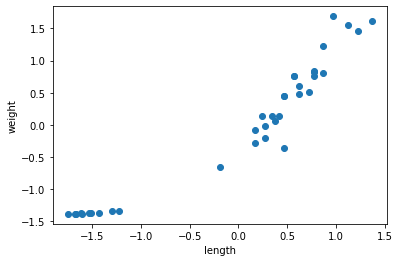

In [36]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 전처리 데이터로 모델 훈련하기

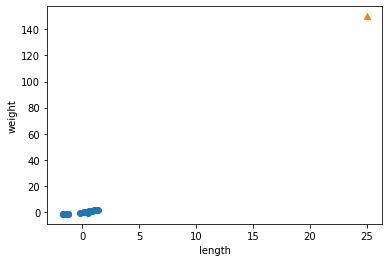

In [37]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**테스트 데이터도 스케일링**

In [40]:
new = ([25, 150]-mean)/std

In [41]:
new

array([-0.23012627, -0.94060693])

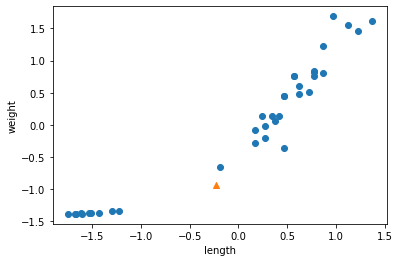

In [42]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [44]:
test_scaled = (test_input - mean) / std

In [45]:
kn.score(test_scaled, test_target)

1.0

In [46]:
#  [] : 2차원 데이터로 바꿔줌
kn.predict([new])

array([1.])

In [47]:
dist, idx = kn.kneighbors([new])

In [48]:
dist

array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]])

In [49]:
idx

array([[21, 14, 34, 32,  5]], dtype=int64)

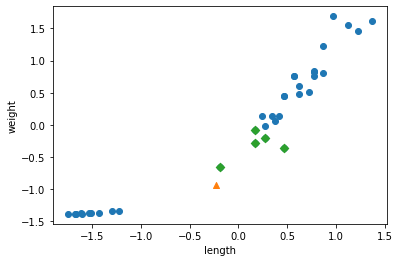

In [52]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()